# 🍄 Fungi Network Notebook

This notebook visualizes and explores the structure of fungal mycelium networks using NetworkX and matplotlib.

Inspired by:

- Mycelial networks in forests
- Network science (Barabási)
- Anna Tsing's ethnography on fungi


In [1]:
import pandas as pd

In [2]:
edges = pd.read_csv("./../data/sample-network.csv")
# Filters out very tiny weights for the purpose of a better visualisation
edges = edges[edges["weight"] >= 1]
# Changes to the correct format to easily add to networkx
edges = edges.to_dict("records")

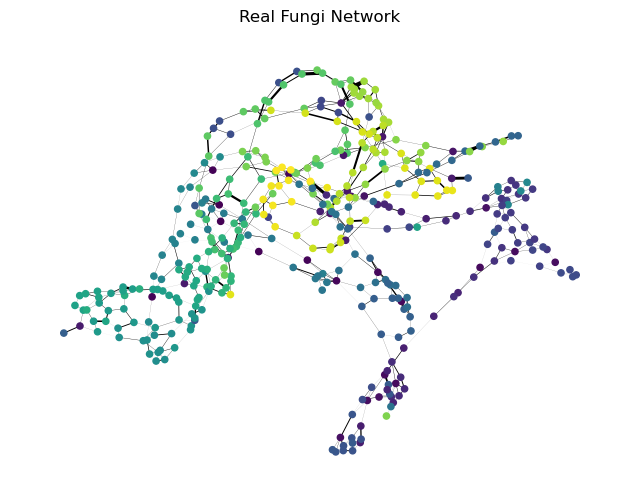

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
for edge in edges:
    G.add_edge(edge["source"], edge["target"], weight=edge["weight"])

edge_weights = [G[u][v]["weight"] * 1.5 for u, v in G.edges]

pos = nx.spring_layout(G, seed=42, weight=None)

plt.figure(figsize=(8, 6))

# We colour the nodes according to their number
nx.draw_networkx_nodes(G, pos, node_size=20, node_color=list(G.nodes), cmap="viridis")
nx.draw_networkx_edges(G, pos, width=[weight/50000 for weight in edge_weights])
# removed network labels as they aren't very clear on the visualisation (left in as a check)
#nx.draw_networkx_labels(G, pos, font_size=6,)
plt.title("Real Fungi Network")
plt.axis("off")
#plt.savefig("../image/fungi-network-real.png")
plt.show()